In [2]:
!pip install paddlepaddle-gpu


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 576.1 MB 9.9 kB/s 
     |████████████████████████████████| 373 kB 69.9 MB/s 


In [3]:
!pip install paddleocr


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 334 kB 19.7 MB/s 
     |████████████████████████████████| 50 kB 6.7 MB/s 
     |████████████████████████████████| 55.7 MB 72 kB/s 
     |████████████████████████████████| 948 kB 40.4 MB/s 
     |████████████████████████████████| 2.7 MB 52.3 MB/s 
     |████████████████████████████████| 604 kB 65.8 MB/s 
     |████████████████████████████████| 404 kB 68.7 MB/s 
     |████████████████████████████████| 2.1 MB 60.3 MB/s 
     |████████████████████████████████| 64 kB 3.1 MB/s 
     |████████████████████████████████| 204 kB 74.0 MB/s 
     |████████████████████████████████| 199 kB 64.7 MB/s 
     |████████████████████████████████| 69 kB 9.8 MB/s 
     |████████████████████████████████| 42 kB 994 kB/s 
     |████████████████████████████████| 2.3 MB 55.5 MB/s 
     |████████████████████████████████| 10.1 MB 51.8 MB/s 
     |████████████████████████████████|

In [21]:
from paddleocr import PaddleOCR,draw_ocr
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
ocr = PaddleOCR(use_angle_cls=True)


[2022/06/27 16:00:19] ppocr DEBUG: Namespace(alpha=1.0, benchmark=False, beta=1.0, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='/root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_fce_box_type='poly', det_limit_side_len=960, det_limit_type='max', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_box_type='quad', det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_polygon=False, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None, e2e_pgnet_mode='f

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
!cd /content/drive/MyDrive/OCR_images


In [24]:
ls

hotel-bill.jpg  simfang.ttf


In [25]:
cd drive

[Errno 2] No such file or directory: 'drive'
/content/drive/MyDrive/OCR_images


In [14]:
ls

MyDrive/


In [26]:
cd MyDrive/OCR_images

[Errno 2] No such file or directory: 'MyDrive/OCR_images'
/content/drive/MyDrive/OCR_images


In [16]:
ls

hotel-bill.jpg


In [36]:
def save_ocr(img_path, out_path, result, font):
  save_path = os.path.join(out_path, img_path.split('/')[-1] + 'output'+".jpg")

  image = cv2.imread(img_path)

  boxes = [line[0] for line in result]
  txts = [line[1][0] for line in result]
  scores = [line[1][1] for line in result]

  im_show = draw_ocr(image, boxes, txts, scores, font_path=font)
 
  cv2.imwrite(save_path, im_show)

  img = cv2.cvtColor(im_show, cv2.COLOR_BGR2RGB)
  plt.imshow(img)

In [43]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,15.5)
# Specifying output path and font path.
out_path = './output_images'
font = './simfang.ttf'

In [44]:
img_path = 'hotel-bill.jpg'
result = ocr.ocr(img_path)

[2022/06/27 16:11:45] ppocr DEBUG: dt_boxes num : 43, elapse : 0.029154062271118164
[2022/06/27 16:11:45] ppocr DEBUG: cls num  : 43, elapse : 0.030005693435668945
[2022/06/27 16:11:45] ppocr DEBUG: rec_res num  : 43, elapse : 0.15191030502319336


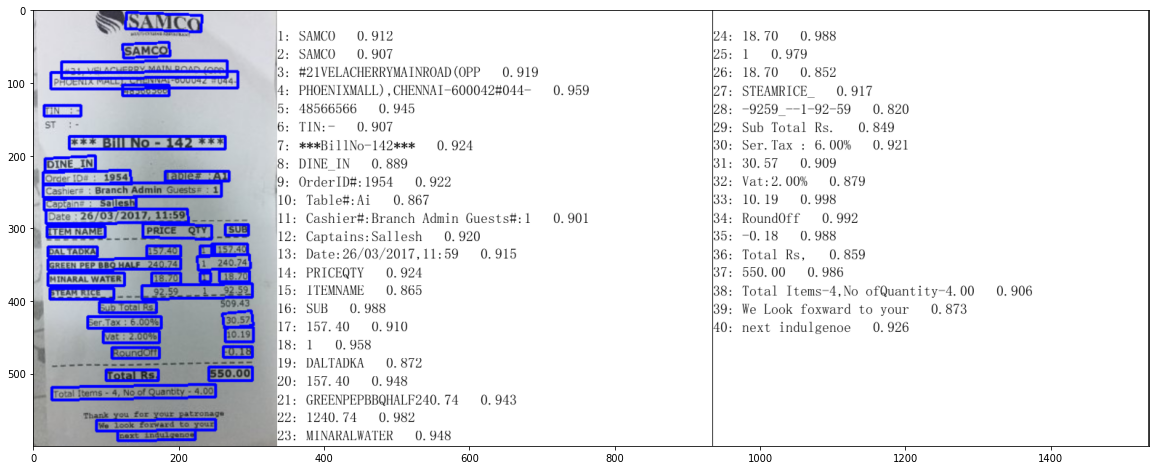

In [45]:
save_ocr(img_path, out_path, result, font)